# Problem Description

In [1]:
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase
from rmgpy import settings
from IPython.display import display
from rmgpy.cantherm.output import prettify

In [2]:
database = RMGDatabase()
database.load(settings['database.directory'], thermoLibraries='none',\
             kineticsFamilies='none', kineticsDepositories='none', reactionLibraries = [])

thermoDatabase = database.thermo

## Example 1

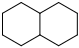

ThermoData(
    Tdata = ([300, 400, 500, 600, 800, 1000, 1500], 'K'),
    Cpdata = ([222.087, 282.838, 336.143, 380.326, 448.441, 497.143, 570.447], 'J/(mol*K)'),
    H298 = (-180.916, 'kJ/mol'),
    S298 = (214.304, 'J/(mol*K)'),
    Cp0 = (33.2579, 'J/(mol*K)'),
    CpInf = (681.787, 'J/(mol*K)'),
    comment = 'Thermo group additivity estimation: group(Cs-CsCsCsH) + other(R) + group(Cs-CsCsCsH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + polycyclic(PolycyclicRing)',
)


In [15]:
spec = Species().fromSMILES('C1CCC2CCCCC2C1')
spec.generateResonanceIsomers()
display(spec)
print prettify(repr(thermoDatabase.getThermoDataFromGroups(spec)))

## Example 2

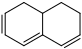

ThermoData(
    Tdata = ([300, 400, 500, 600, 800, 1000, 1500], 'K'),
    Cpdata = ([192.464, 248.446, 293.006, 326.185, 375.807, 409.948, 460.868], 'J/(mol*K)'),
    H298 = (127.486, 'kJ/mol'),
    S298 = (158.197, 'J/(mol*K)'),
    Cp0 = (33.2579, 'J/(mol*K)'),
    CpInf = (532.126, 'J/(mol*K)'),
    comment = 'Thermo group additivity estimation: group(Cs-(Cds-Cds)CsCsH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cds-Cds(Cds-Cds)Cs) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + polycyclic(PolycyclicRing)',
)


In [13]:
spec1 = Species().fromSMILES('C=1CCC2CC=CC=C2C1')
spec1.generateResonanceIsomers()
display(spec1)
print prettify(repr(thermoDatabase.getThermoDataFromGroups(spec1)))

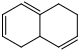

ThermoData(
    Tdata = ([300, 400, 500, 600, 800, 1000, 1500], 'K'),
    Cpdata = ([158.448, 212.129, 258.069, 295.6, 351.582, 391.037, 449.654], 'J/(mol*K)'),
    H298 = (175.657, 'kJ/mol'),
    S298 = (397.815, 'J/(mol*K)'),
    Cp0 = (33.2579, 'J/(mol*K)'),
    CpInf = (532.126, 'J/(mol*K)'),
    comment = 'Thermo group additivity estimation: group(Cs-(Cds-Cds)(Cds-Cds)CsH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cds-CdsCsCs) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + polycyclic(pdt19-1)',
)


In [7]:
spec1_sib = Species().fromSMILES('C1C=CC2CC=CC=C2C1')
spec1_sib.generateResonanceIsomers()
display(spec1_sib)
print prettify(repr(thermoDatabase.getThermoDataFromGroups(spec1_sib)))

`spec1` only matches the most generic polycyclic correction, while its sibling `spec1_sib` in below can find a specific correction. So here is 

**PROBLEM 1: The correction data in database is not effectively used; it's only used if a exact match is found.**

**SOLUTION: re-organize the polycyclic tree to enable RMG to use sibling info.**

# Example 3

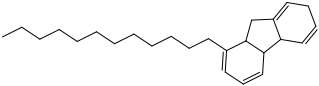

ThermoData(
    Tdata = ([300, 400, 500, 600, 800, 1000, 1500], 'K'),
    Cpdata = ([483.21, 625.675, 749.815, 850.984, 1005.96, 1116.84, 1280.56], 'J/(mol*K)'),
    H298 = (-8.24248, 'kJ/mol'),
    S298 = (754.613, 'J/(mol*K)'),
    Cp0 = (33.2579, 'J/(mol*K)'),
    CpInf = (1504.92, 'J/(mol*K)'),
    comment = 'Thermo group additivity estimation: group(Cs-(Cds-Cds)CsCsH) + other(R) + group(Cs-(Cds-Cds)CsCsH) + other(R) + group(Cs-(Cds-Cds)(Cds-Cds)CsH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)(Cds-Cds)HH) + other(R) + group(Cs-CsHHH) + other(R) + group(Cds-CdsCsCs) + other(R) + group(Cds-CdsCsCs) + other(R) + group(Cds-CdsCsH)

In [5]:
spec2 = Species().fromSMILES('CCCCCCCCCCCCC1=CC=CC2C3C=CCC=C3CC12')
spec2.generateResonanceIsomers()
display(spec2)
print prettify(repr(thermoDatabase.getThermoDataFromGroups(spec2)))

`spec2` has a 3-ring polycyclic group, but it partially matches a 2-ring polycyclic correction. We know it probably has very different correction from the actual 3-ring correction. So here is 

**PROBLEM 2: we don't have enough data in database**

**SOLUTION: detect partial match for polycyclic molecules, spawn QM job and enlarge the database. In the meantime, for large molecules, we might also want to develop a heuristic/machine learning way of estimating polycyclic correction.**

# Example 4

Currently when having new data for polycyclic groups, we simply insert it in L2 as below
```python
...
    L2: INDENE
    L2: INDENE-1
    L2: 2HINDENE
    L2: prod2
    L2: prod2-1
    L2: prod4
    L2: prod4-1
    L2: naphthalene
    L2: naphthalene-1
```
**PROBLEM 4** includes two issues:

- worsen the problem shown in `Example 2`, if no exact match, return to generic node directly.

- hard to figure out what data we are lacking, what we add is just some examples not systematic solution.

# Potential Contributions to Make

- Re-organize the polycyclic tree in a checmically sensible way which helps
    
    - better use available sibling data when no exact match is found
    
    - figure out what data is lacking
    
    - gain insights for generalization
    
- Provide a scheme to use tree as a building block to best guess for complicated polycyclic ring correction

- Automatic workflow to enlarge polycyclic database from identification through QM job to new entry insertion. 

# Trial Case: Polycyclic s1_3_6

This trial case to demonstrate how the workflow looks like. The subject is `Polycyclic s1_3_6`, which is a set of molecules with two rings sharing one common atom (called `spiro`). Part of the reason choosing it is that it's observed in pdd modeling, by fixing it, we can directly test the outcome of this project.

This trial case workflow consists of 4 steps:

1. Construct polycyclic tree,

2. Run representative molecules,

3. Extract polycyclic corrections, and

4. Fill the corrections into polycyclic tree

## Construct thermo tree

```python
...
    L2: s1_3_6
        L3: s1_3_6_ane
        L3: s1_3_6_ene
            L4: s1_3_6_ene_1
            L4: s1_3_6_ene_2
        L3: s1_3_6_diene
            L4: s1_3_6_diene_1_4
            L4: s1_3_6_diene_1_3

```

## Run representative molecules

Input: QM input file containing representative molecules' structures

Output: a thermo library containing representative molecules' thermochemistry

## Extract polycyclic corrections

Input: the thermo libray obtained from last step

Ouput: polycyclic corrections for molecules in library

In [ ]:
import copy
from rmgpy.data.thermo import *
from utilities.thermo import extractPolycyclicGroups, convertCycleToGroup, displayThermo, compareThermoData

thermoLibraries = ['polycyclic_all_thermoLiabrary']
database.load(settings['database.directory'], thermoLibraries = thermoLibraries,\
              kineticsFamilies='none', kineticsDepositories='none', reactionLibraries=[])

thermoDatabase = database.thermo
thermoDatabase0 = copy.deepcopy(database.thermo)

In [ ]:
from rmgpy.species import Species
libraryName = thermoLibraries[0]
thermoLibrary = thermoDatabase.libraries[libraryName]
for label, entry in thermoLibrary.entries.iteritems():
    molecule = entry.item
    libraryMolThermoData = entry.data
    
    lib_spec = Species(molecule=[molecule])
    lib_spec.generateResonanceIsomers()
    isomers_num = len(lib_spec.molecule)
    
    matched_group_idx = 0
    isomer_idx = -1
    while matched_group_idx == 0 and isomer_idx < (isomers_num - 1):
        isomer_idx += 1
        molecule = lib_spec.molecule[isomer_idx]
        # display(molecule)
        if molecule.getAllPolycyclicVertices():
            # using currect thermodatabase to estimate the target molecules
            estimatedMolThermo = thermoDatabase.estimateThermoViaGroupAdditivity(molecule)
            ringGroups, polycyclicGroups = thermoDatabase.getRingGroupsFromComments(estimatedMolThermo)

            # representative molecules for polycyclic should not be designed either to have sing-ring structure
            # or have more than one polycyclic structures
            assert len(ringGroups) == 0 
            assert len(polycyclicGroups) == 1
            polycyclicGroup = polycyclicGroups[0]
            matched_group_idx = polycyclicGroup.index
    # if matched_group is still generic (index = 0)
    # give a warning
    if matched_group_idx == 0:
        print "Warning: {} in library cannot match a specific node in tree, will not use this species!".format(label)
        continue
        
        
    # extract polycyclic correction from library value
    withoutPolycyclicGroupThermo = removeThermoData(copy.deepcopy(estimatedMolThermo), polycyclicGroup.data)
    newPolycyclicGroupThermo = removeThermoData(copy.deepcopy(libraryMolThermoData), withoutPolycyclicGroupThermo)
    # visualize the difference between old and new corrections
#         print label
#         print "Old polycyclic correction:"
#         print prettify(repr(polycyclicGroup.data))
#         print "New polycyclic correction:"
#         print prettify(repr(newPolycyclicGroupThermo))

    # update polycyclic group thermo and comments
    polycyclicGroup.data = newPolycyclicGroupThermo

    polycyclicGroup.shortDesc = "Fitted from thermo library values"
    comment = "Fitted from molecule {0} from {1} library.\n".format(label,libraryName)
    polycyclicGroup.longDesc = comment.strip()

## Fill corrections into polycyclic tree

In [ ]:
for key in thermoDatabase.groups['polycyclic'].entries:
    entry = thermoDatabase.groups['polycyclic'].entries[key]
    if entry.index == 0  and entry.label != 'PolycyclicRing' and entry.data != None:
        print entry.label
        entry.data = None

In [ ]:
# save the updated polycyclic corrections to file `new_polycyclic.py`; one can overwrite `polycyclic.py` once
# double checked it.
thermoDatabase.groups['polycyclic'].save(settings['database.directory'] + '/thermo/groups/' + 'new_polycyclic.py')

## Benchmark

In [ ]:
spec_test = Species().fromSMILES('CCCCCCCCCCC1CC12C=C[CH]C=C2')
spec_test.generateResonanceIsomers()
display(spec_test)
print "old thermodatabase estimation:"
displayThermo(thermoDatabase0.getThermoDataFromGroups(spec_test))
print ""
print "new thermodatabase estimation:"
displayThermo(thermoDatabase.getThermoDataFromGroups(spec_test))

Mopac calculates thermo for this species as below:
```python
H298 = (12.75,'kcal/mol'),
S298 = (159.93,'cal/mol*K'),
```

## Generalization

### s1 polycyclics

In [ ]:
parentNode = thermoDatabase.groups['polycyclic'].entries['s1_3_6']

for child in parentNode.children:
    if child.data != None:
        print "polycyclic correction for {0}: {1}".format(child.label, child.data.S298)
    else:
        if child.children:
            for grandchild in child.children:
                print "polycyclic correction for {0}: {1}".format(grandchild.label, grandchild.data.S298)

In [ ]:
ring3a = thermoDatabase.groups['ring'].entries['Cyclopropane']
ring3e = thermoDatabase.groups['ring'].entries['Cyclopropene']
print "ring correction for {0}: {1}, {2}".format(ring3a.label, ring3a.data.H298, ring3a.data.S298)
print "ring correction for {0}: {1}, {2}".format(ring3e.label, ring3e.data.H298, ring3e.data.S298)

In [ ]:
(55.4702)*4.184

In [ ]:
ring4a = thermoDatabase.groups['ring'].entries['Cyclobutane']
ring4e = thermoDatabase.groups['ring'].entries['Cyclobutene']
print "ring correction for {0}: {1}, {2}".format(ring4a.label, ring4a.data.H298, ring4a.data.S298)
print "ring correction for {0}: {1}, {2}".format(ring4e.label, ring4e.data.H298, ring4e.data.S298)

In [ ]:
(26.2)*4.184

### s2 polycylics

In [ ]:
parentNode = thermoDatabase.groups['polycyclic'].entries['s2_4_5']

for child in parentNode.children:
    if child.data != None:
        print "polycyclic correction for {0}: {1}".format(child.label, child.data.H298)
    else:
        if child.children:
            for grandchild in child.children:
                print "polycyclic correction for {0}: {1}".format(grandchild.label, grandchild.data.H298)

In [ ]:
ring5a = thermoDatabase.groups['ring'].entries['Cyclopentane']
ring5e = thermoDatabase.groups['ring'].entries['Cyclopentene']
print "ring correction for {0}: {1}, {2}".format(ring5a.label, ring5a.data.H298, ring5a.data.S298)
print "ring correction for {0}: {1}, {2}".format(ring5e.label, ring5e.data.H298, ring5e.data.S298)

In [ ]:
(5.97)*4.184

### s3 polycyclics

In [ ]:
parentNode = thermoDatabase.groups['polycyclic'].entries['s3_5_6']

for child in parentNode.children:
    if child.data != None:
        print "polycyclic correction for {0}: {1}".format(child.label, child.data.H298)
    else:
        if child.children:
            for grandchild in child.children:
                print "polycyclic correction for {0}: {1}".format(grandchild.label, grandchild.data.H298)

In [ ]:
(1.17)*4.184

In [ ]:
ring6a = thermoDatabase.groups['ring'].entries['Cyclohexane']
ring6e = thermoDatabase.groups['ring'].entries['Cyclohexene']
print "ring correction for {0}: {1}, {2}".format(ring6a.label, ring6a.data.H298, ring6a.data.S298)
print "ring correction for {0}: {1}, {2}".format(ring6e.label, ring6e.data.H298, ring6e.data.S298)